In [72]:
import pandas as pd
import numpy as np
import string
# import these modules
import nltk
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC, LinearSVC, SVR, NuSVC
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
#load datasets
df_imdb = pd.read_csv('../data/imdb_labelled.txt', sep='\t', header=None)
df_imdb.columns = ['review', 'sentiment']
df_amazon = pd.read_csv('../data/amazon_cells_labelled.txt', sep='\t', header=None)
df_amazon.columns = ['review', 'sentiment']
df_yelp = pd.read_csv('../data/yelp_labelled.txt', sep='\t', header=None)
df_yelp.columns = ['review', 'sentiment']
df_imdb.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [14]:
#split to text and labels

text_imdb = df_imdb.iloc[:,0]
y_imdb = df_imdb.iloc[:,1]

text_amazon = df_amazon.iloc[:,0]
y_amazon = df_amazon.iloc[:,1]


text_yelp = df_yelp.iloc[:,0]
y_yelp = df_yelp.iloc[:,1]

In [15]:
#You need to download resources below for them

# nltk.download('punkt')
# nltk.download('stopwords')

In [16]:
#create an object of class PorterStemmer
porter = PorterStemmer()

In [17]:
def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

In [18]:
# def preproc(text):
#     result=[]
#     stop_words = set(stopwords.words('english'))   
#     for line in range(0, text.shape[0]): 
#         #First stemming
#         stem_sentence=stemSentence(text[line])
#         #then use stem_sentece for tokenization, punctiation and stopwords removal
        
#         tokenizer = RegexpTokenizer(r'\w+')
#         word_tokens=tokenizer.tokenize(stem_sentence)
#         word_tokens=word_tokenize(stem_sentence)
    
#         filtered_sentence = [w for w in word_tokens if not w in stop_words] 

#         filtered_sentence = [] 

#         for w in word_tokens: 
#             if w not in stop_words: 
#                 filtered_sentence.append(w) 

                
        
#     return filtered_sentence
  

In [19]:

def porterStemer(text):
    #Stemming
    result=[]
    for line in range(0, text.shape[0]): 
        stem_sentence=stemSentence(text[line])
        result.append(stem_sentence)
        
    
    return result

In [20]:
#Run Porter Stemmer for text_imdb
porterStemer(text_imdb)

['A veri , veri , veri slow-mov , aimless movi about a distress , drift young man . ',
 'not sure who wa more lost - the flat charact or the audienc , nearli half of whom walk out . ',
 'attempt arti with black & white and clever camera angl , the movi disappoint - becam even more ridicul - as the act wa poor and the plot and line almost non-exist . ',
 'veri littl music or anyth to speak of . ',
 'the best scene in the movi wa when gerardo is tri to find a song that keep run through hi head . ',
 "the rest of the movi lack art , charm , mean ... If it 's about empti , it work I guess becaus it 's empti . ",
 'wast two hour . ',
 'saw the movi today and thought it wa a good effort , good messag for kid . ',
 'A bit predict . ',
 'love the cast of jimmi buffet as the scienc teacher . ',
 'and those babi owl were ador . ',
 "the movi show a lot of florida at it 's best , made it look veri appeal . ",
 'the song were the best and the muppet were So hilari . ',
 'It wa So cool . ',
 "thi i

In [21]:
#Removing stop words with NLTK

def rmStopWords(text):
    result = []
    stop_words = set(stopwords.words('english'))   
    
    for line in range(0, text.shape[0]): 
        word_tokens=word_tokenize(text[line])
    
        filtered_sentence = [w for w in word_tokens if not w in stop_words] 

        filtered_sentence = [] 

        for w in word_tokens: 
            if w not in stop_words: 
                filtered_sentence.append(w) 

        print(word_tokens) 

        print("===")

        print(filtered_sentence) 
        print('---------------------------------------------------')


In [22]:
rmStopWords(text_imdb)

['A', 'very', ',', 'very', ',', 'very', 'slow-moving', ',', 'aimless', 'movie', 'about', 'a', 'distressed', ',', 'drifting', 'young', 'man', '.']
===
['A', ',', ',', 'slow-moving', ',', 'aimless', 'movie', 'distressed', ',', 'drifting', 'young', 'man', '.']
---------------------------------------------------
['Not', 'sure', 'who', 'was', 'more', 'lost', '-', 'the', 'flat', 'characters', 'or', 'the', 'audience', ',', 'nearly', 'half', 'of', 'whom', 'walked', 'out', '.']
===
['Not', 'sure', 'lost', '-', 'flat', 'characters', 'audience', ',', 'nearly', 'half', 'walked', '.']
---------------------------------------------------
['Attempting', 'artiness', 'with', 'black', '&', 'white', 'and', 'clever', 'camera', 'angles', ',', 'the', 'movie', 'disappointed', '-', 'became', 'even', 'more', 'ridiculous', '-', 'as', 'the', 'acting', 'was', 'poor', 'and', 'the', 'plot', 'and', 'lines', 'almost', 'non-existent', '.']
===
['Attempting', 'artiness', 'black', '&', 'white', 'clever', 'camera', 'angle

['It', 'failed', 'to', 'convey', 'the', 'broad', 'sweep', 'of', 'landscapes', 'that', 'were', 'a', 'great', 'part', 'of', 'the', 'original', '.']
===
['It', 'failed', 'convey', 'broad', 'sweep', 'landscapes', 'great', 'part', 'original', '.']
---------------------------------------------------
['Generally', ';', 'it', 'just', 'lacked', 'imagination', '.']
===
['Generally', ';', 'lacked', 'imagination', '.']
---------------------------------------------------
['Not', 'recommended', '.']
===
['Not', 'recommended', '.']
---------------------------------------------------
['Is', 'it', 'possible', 'for', 'a', 'movie', 'to', 'get', 'any', 'worse', 'than', 'this', '?']
===
['Is', 'possible', 'movie', 'get', 'worse', '?']
---------------------------------------------------
['There', 'is', 'no', 'plot', 'here', 'to', 'keep', 'you', 'going', 'in', 'the', 'first', 'place', '.']
===
['There', 'plot', 'keep', 'going', 'first', 'place', '.']
---------------------------------------------------
['Even

---------------------------------------------------
['You', 'can', 'find', 'better', 'movies', 'at', 'youtube', '.']
===
['You', 'find', 'better', 'movies', 'youtube', '.']
---------------------------------------------------
['Top', 'line', ':', 'Do', "n't", 'waste', 'your', 'time', 'and', 'money', 'on', 'this', 'one', ',', 'its', 'as', 'bad', 'as', 'it', 'comes', '.']
===
['Top', 'line', ':', 'Do', "n't", 'waste', 'time', 'money', 'one', ',', 'bad', 'comes', '.']
---------------------------------------------------
['A', 'Lassie', 'movie', 'which', 'should', 'have', 'been', '``', 'put', 'to', 'sleep', "''", '...', '.', 'FOREVER', '.']
===
['A', 'Lassie', 'movie', '``', 'put', 'sleep', "''", '...', '.', 'FOREVER', '.']
---------------------------------------------------
['That', "'s", 'how', 'I', "'d", 'describe', 'this', 'painfully', 'dreary', 'time-waster', 'of', 'a', 'film', '.']
===
['That', "'s", 'I', "'d", 'describe', 'painfully', 'dreary', 'time-waster', 'film', '.']
------------

In [23]:
#Function for removing puncuation
def rmPunctuation(text):
    for line in range(0, text.shape[0]): 
        print(text[line])
        tokenizer = RegexpTokenizer(r'\w+')
        word_tokens=tokenizer.tokenize(text[line])
        print('===============')
        print(word_tokens)



In [24]:
rmPunctuation(text_imdb)

A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  
['A', 'very', 'very', 'very', 'slow', 'moving', 'aimless', 'movie', 'about', 'a', 'distressed', 'drifting', 'young', 'man']
Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  
['Not', 'sure', 'who', 'was', 'more', 'lost', 'the', 'flat', 'characters', 'or', 'the', 'audience', 'nearly', 'half', 'of', 'whom', 'walked', 'out']
Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  
['Attempting', 'artiness', 'with', 'black', 'white', 'and', 'clever', 'camera', 'angles', 'the', 'movie', 'disappointed', 'became', 'even', 'more', 'ridiculous', 'as', 'the', 'acting', 'was', 'poor', 'and', 'the', 'plot', 'and', 'lines', 'almost', 'non', 'existent']
Very little music or anything to speak of.  
['Very', 'little', 'music', 'or', 'any

['The', 'dialogue', 'is', 'composed', 'of', 'things', 'that', 'make', 'little', 'sense']
About 30 minutes of footage is wasted to show mediocre elderly actors awkwardly babbling overwrought pseudo-Satanic gibberish corny enough to make a teen Goth blush, almost always in Olde English, and sometimes in Latin that may or may not be made up words.  
['About', '30', 'minutes', 'of', 'footage', 'is', 'wasted', 'to', 'show', 'mediocre', 'elderly', 'actors', 'awkwardly', 'babbling', 'overwrought', 'pseudo', 'Satanic', 'gibberish', 'corny', 'enough', 'to', 'make', 'a', 'teen', 'Goth', 'blush', 'almost', 'always', 'in', 'Olde', 'English', 'and', 'sometimes', 'in', 'Latin', 'that', 'may', 'or', 'may', 'not', 'be', 'made', 'up', 'words']
The directing is sloppy at best.  
['The', 'directing', 'is', 'sloppy', 'at', 'best']
Hackneyed writing, certainly, but made even worse by the bad directing.  
['Hackneyed', 'writing', 'certainly', 'but', 'made', 'even', 'worse', 'by', 'the', 'bad', 'directing']


In [25]:
#find unique words and sort them
def distinct(text):
    distincts = []
    ordered_tokens = set()
    result = []
    for line in range(0, text.shape[0]): 
        word_data = text[line]
        # First Word tokenization
        nltk_tokens = nltk.word_tokenize(word_data)

        #Preserving the Order
        for word in nltk_tokens:
            if word not in ordered_tokens:
                ordered_tokens.add(word)
                result.append(word)

    result.sort()
    print(result)    


In [26]:
distinct(text_imdb)

['!', '$', '%', '&', "'", "''", "'Cover", "'Ive", "'Titta", "'d", "'film", "'ll", "'m", "'must", "'re", "'s", "'so", "'stagey", "'ve", '(', ')', '***SPOILERS***', '+', ',', '-', '--', '-period', '.', '..', '...', '.a', '.an', '.stylized', '0', '0/10', '1', '1-10', '1/10', '10', '10+', '10/10', '12', '15', '18th', '1928', '1947', '1948', '1949', '1971', '1973', '1980', '1986', '1995', '1998', '2', '20', '20.The', '2005', '2006', '20th', '25', '3', '30', '4', '40', '5', '5-year', '50', '54', '7.50', '70', '70000', '70s', '8', '8.15pm', '8/10', '80', '80s', '8pm', '9', '9/10', '90', '95', ':', ';', '?', 'A', 'A+', 'ALL', 'AMAZING', 'AND', 'AWFUL', 'Aailiyah', 'About', 'Academy', 'Achille', 'Ackerman', 'Actors', 'Actually', 'Adams', 'Affleck', 'Africa', 'After', 'Again', 'Air', 'Akasha', 'Alexander', 'All', 'Allison', 'Almost', 'Also', 'America', 'American', 'Americans', 'An', 'And', 'Angel', 'Angela', 'Angeles', 'Angelina', 'Angus', 'Anita', 'Ann', 'Anne', 'Another', 'Anthony', 'Anyway', 

In [27]:
#find unique words and return them Sorted
def distinctSorted(lista):
    distinct=list()
    for i in range(len(lista)):
        distinct=distinct+list(set(lista[i]))

    result = list(set(distinct))    
    result.sort()
    
    return result


In [28]:
# function for text preprocess
def preprocess(text):
    
    stop_words = set(stopwords.words('english'))
    ps = nltk.stem.PorterStemmer()
    result=[]
    for i in range(0,text.shape[0]):

        # split sentence in tokens
        tokens = word_tokenize(text[i])
        # stemming
        tokens = [ps.stem(w) for w in tokens]
        #print(tokens)
        # take words not cleaned
        words = [w for w in tokens]
        #remove stop words
        words = [w for w in words if not w in stop_words]
        #remove punctuation
        table = str.maketrans('', '', string.punctuation)
        words = [w.translate(table) for w in words]
        words=[x for x in words if x]
        result.append(words)
   
    return result

preprocess(text_imdb)

[['A',
  'veri',
  'veri',
  'veri',
  'slowmov',
  'aimless',
  'movi',
  'distress',
  'drift',
  'young',
  'man'],
 ['sure',
  'wa',
  'lost',
  'flat',
  'charact',
  'audienc',
  'nearli',
  'half',
  'walk'],
 ['attempt',
  'arti',
  'black',
  'white',
  'clever',
  'camera',
  'angl',
  'movi',
  'disappoint',
  'becam',
  'even',
  'ridicul',
  'act',
  'wa',
  'poor',
  'plot',
  'line',
  'almost',
  'nonexist'],
 ['veri', 'littl', 'music', 'anyth', 'speak'],
 ['best',
  'scene',
  'movi',
  'wa',
  'gerardo',
  'tri',
  'find',
  'song',
  'keep',
  'run',
  'hi',
  'head'],
 ['rest',
  'movi',
  'lack',
  'art',
  'charm',
  'mean',
  'If',
  's',
  'empti',
  'work',
  'I',
  'guess',
  'becaus',
  's',
  'empti'],
 ['wast', 'two', 'hour'],
 ['saw',
  'movi',
  'today',
  'thought',
  'wa',
  'good',
  'effort',
  'good',
  'messag',
  'kid'],
 ['A', 'bit', 'predict'],
 ['love', 'cast', 'jimmi', 'buffet', 'scienc', 'teacher'],
 ['babi', 'owl', 'ador'],
 ['movi',
  'show'

In [29]:
reviews = preprocess(text_imdb) + preprocess(text_amazon) + preprocess(text_yelp)
y = np.concatenate((y_imdb.values,  y_amazon.values, y_yelp.values))
print(len(reviews))

2748


In [30]:
res = distinctSorted(reviews)

In [31]:
def vectorize(df,v):
    vectorizer = CountVectorizer(vocabulary=v, ngram_range=(1, 1)) # n_gram
    sentences_vectors = np.zeros([len(df),len(res)])
    for i in range(1,len(df)):
        temp = vectorizer.transform([" ".join(df[i])])
        sentences_vectors[i,]=temp.toarray()
    print(sentences_vectors)
    return sentences_vectors


reviews_vec = vectorize(reviews,res)



[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [32]:
#split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(reviews_vec,y,test_size=0.2,random_state=1,shuffle=True,stratify=y)

In [33]:
#scale/normalize features X_train[0,1] because the algorithms computes distance(eg LDA)

scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)

X_test= scaler.transform(X_test)

In [34]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  

/home/gtsal/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.506, total=  12.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.6s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.505, total=  11.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   24.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.504, total=  11.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.505, total=  11.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.505, total=  10.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.504, total=  11.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.505, total=  11.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.505, total=  11.4s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.504, total=  11.5s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.641, total=  11.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.640, total=  10.7s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.678, total=  10.8s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.756, total=   8.8s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.730, total=   8.9s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.736, total=   8.7s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.753, total=   9.9s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 13.3min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
#Run cross validation for svc
grid_svc = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid_svc.fit(X_train, y_train)

In [67]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [68]:
#Run SVM with the best parameters after tuning
svc = SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [69]:
svc.fit(X_train, y_train)
Y_pred_svc = svc.predict(X_test)

In [70]:
# print classification report 
print(classification_report(y_test, Y_pred_svc))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       273
           1       0.81      0.80      0.80       277

    accuracy                           0.80       550
   macro avg       0.80      0.80      0.80       550
weighted avg       0.80      0.80      0.80       550



In [90]:
cm = confusion_matrix(y_test, Y_pred_svc)
print(cm)

[[220  53]
 [ 55 222]]


In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

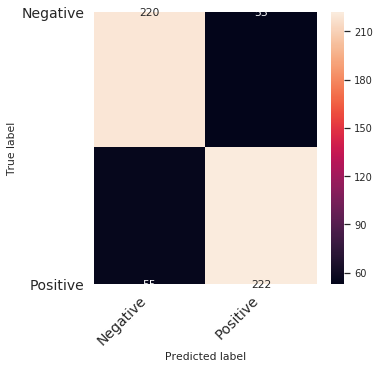

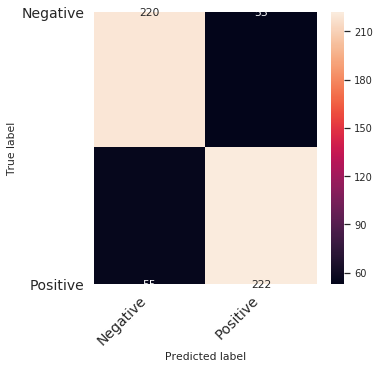

In [113]:
print_confusion_matrix(cm, class_names=["Negative","Positive"], figsize = (5,5))